In [2]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [4]:
transform = transforms.ToTensor()

# Train data
trainData = datasets.MNIST(root= "D:\Programming Files\pytorch\mnistModel\mnistData", train=True, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting D:\Programming Files\pytorch\mnistModel\mnistData\MNIST\raw\train-images-idx3-ubyte.gz to D:\Programming Files\pytorch\mnistModel\mnistData\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting D:\Programming Files\pytorch\mnistModel\mnistData\MNIST\raw\train-labels-idx1-ubyte.gz to D:\Programming Files\pytorch\mnistModel\mnistData\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting D:\Programming Files\pytorch\mnistModel\mnistData\MNIST\raw\t10k-images-idx3-ubyte.gz to D:\Programming Files\pytorch\mnistModel\mnistData\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting D:\Programming Files\pytorch\mnistModel\mnistData\MNIST\raw\t10k-labels-idx1-ubyte.gz to D:\Programming Files\pytorch\mnistModel\mnistData\MNIST\raw



In [5]:
testData = datasets.MNIST(root="D:\Programming Files\pytorch\mnistModel\mnistData", train=False, download=True, transform=transform)

In [7]:
train_loader = DataLoader(trainData, batch_size=8, shuffle=True)
test_loader = DataLoader(testData, batch_size=8, shuffle=True)

In [12]:
for i, (x_train, y_train) in enumerate(trainData):
  break

In [25]:
class CnnModel(nn.Module): 
    def __init__(self):
        super().__init__()

        ## define the layers themselves
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 12, 3)

        # NN layers
        self.fc1 = nn.Linear(12 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 64)
        self.out = nn.Linear(64, 10)

    # forward prop algo method // create the sequence of layers
    def forward(self, x) :
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))

        # maxPool
        x = F.max_pool2d(x, 2, 2)

        # flatten to feed into NN
        x = x.view(-1, 12 * 12 * 12)

        # feed into NN
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return F.log_softmax(x, dim=1)
        



In [26]:
# define an instance of the model class
model = CnnModel()
model

CnnModel(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1728, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)

In [27]:
# cost function 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.005)

In [29]:
# Train model

for b in range(5):
    for i, (x_train, y_train) in enumerate(train_loader):
        
        ## forward prop
        y_pred = model.forward(x_train)

        ## cost fun
        loss = criterion(y_pred, y_train)

        ## back prop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 300 == 0:
            print(f'{i}). loss: {loss}')

0). loss: 0.11159402132034302
300). loss: 0.0002237735316157341
600). loss: 0.04957892373204231
900). loss: 1.0229829549789429
1200). loss: 0.011046098545193672
1500). loss: 0.08050641417503357
1800). loss: 0.11633673310279846
2100). loss: 0.28090187907218933
2400). loss: 0.6631134152412415
2700). loss: 0.5438594222068787
3000). loss: 0.00018029219063464552
3300). loss: 4.328054274083115e-05
3600). loss: 2.6374989374744473e-06
3900). loss: 0.15817880630493164
4200). loss: 0.0001536275231046602
4500). loss: 0.26186996698379517
4800). loss: 0.1165311336517334
5100). loss: 0.036408036947250366
5400). loss: 0.00041798781603574753
5700). loss: 0.0006382163846865296
6000). loss: 0.5155696272850037
6300). loss: 0.041289106011390686
6600). loss: 0.0010476013412699103
6900). loss: 0.20858033001422882
7200). loss: 0.013660164549946785
0). loss: 0.03930680826306343
300). loss: 0.00010883414506679401
600). loss: 0.0002404199040029198
900). loss: 0.0002499265829101205
1200). loss: 0.000251316494541

In [32]:
# loadTestEverything = DataLoader(testData, batch_size=10000, shuffle=True)

with torch.no_grad() :
    correct = 0
    for x_test, y_test in testData:
        y_val = model.forward(x_test)
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted == y_test).sum()
     

In [34]:
# Accuracy Calculation
correct.item()/len(testData) * 100

97.44

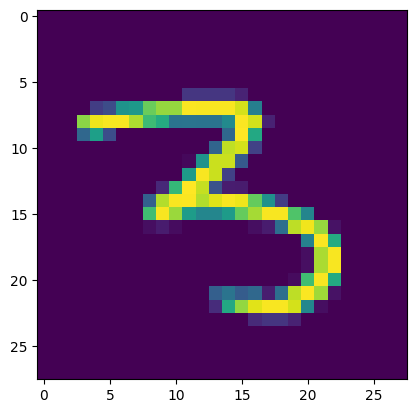

In [41]:
import matplotlib.pyplot as plt
plt.imshow(testData[1298][0].reshape(28,28))

In [49]:
# get the model predection 
with torch.no_grad():
    pred = model.forward(testData[1298][0])

pred.argmax()

tensor(3)